In [1]:
from helpers.findSpheresInSnapshots_mod import getParticlesWithinSphere

In [2]:
import halotools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname = 'diemerL0500', version_name = 'antonio',redshift = 0, \
                            halo_finder = 'rockstar',ptcl_version_name='antonio')

In [4]:
mask = halocat.halo_table['halo_mvir']>1e15

In [5]:
halo_x = halocat.halo_table['halo_x'][mask]
halo_y = halocat.halo_table['halo_y'][mask]
halo_z = halocat.halo_table['halo_z'][mask]

center = np.zeros((len(halo_x),3))

center[:,0] = halo_x
center[:,1] = halo_y
center[:,2] = halo_z

In [8]:
center.shape

(36, 3)

In [9]:
distance = []

In [10]:
for halo in center:
    distance.append(getParticlesWithinSphere(halo,2,\
      '/home/kuw8/.astropy/cache/halotools/particle_catalogs/diemerL0500/hlist_1.00000.particles.antonio.hdf5',500))

[Info] Calculating the edges of each snapshot file...
[Info] Calculating the edges of each snapshot file...
[Info] Calculating the edges of each snapshot file...
[Info] Calculating the edges of each snapshot file...
[Info] Calculating the edges of each snapshot file...
[Info] Calculating the edges of each snapshot file...
[Info] Calculating the edges of each snapshot file...
[Info] Calculating the edges of each snapshot file...
[Info] Calculating the edges of each snapshot file...
[Info] Calculating the edges of each snapshot file...
[Info] Calculating the edges of each snapshot file...
[Info] Calculating the edges of each snapshot file...
[Info] Calculating the edges of each snapshot file...
[Info] Calculating the edges of each snapshot file...
[Info] Calculating the edges of each snapshot file...
[Info] Calculating the edges of each snapshot file...
[Info] Calculating the edges of each snapshot file...
[Info] Calculating the edges of each snapshot file...
[Info] Calculating the edges

[    0.           717.79429127  1824.40500384  1030.45728916   873.03166448
  1849.1408989   1566.64286216  1592.76333719  1349.4327635    762.18428719
  1130.05098978   957.41017792   811.14414931   294.52438291  1247.64565665
  1127.50891035   835.84940122  1062.23179021   857.09704079   980.31074788
   769.02420369   938.215278     772.80165656   991.46153439   824.14446008
   805.65897668   728.08146293   424.08477039   734.92413422   885.54364278
   937.82106322   953.45725718  1047.60930468   980.24061692  1084.16266762
  1169.27375032  1181.39873713  1382.91337254  1294.5634055   1091.51657952
   903.54236745   759.82844058   647.75587522   516.87396442   443.66419169
   366.62142456   320.11181404   280.65602396   258.53329717   224.56264698]
[    0.             0.             0.             0.             0.             0.
     0.             0.             0.             0.             0.
   136.77288256     0.            98.1747943      0.            70.4693069
   119.407057

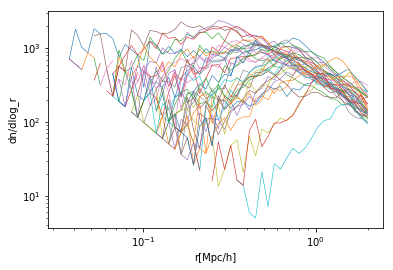

In [21]:
rbins = np.logspace(-1.5,0.3,51)
plt.loglog()
plt.xlabel('r[Mpc/h]')
plt.ylabel('dn/dlog_r')
for i,dist in enumerate(distance):
    nptcls = np.histogram(dist['r'],bins=rbins)
    rho_ptcls = nptcls[0]/rbins[1:]**2
    print rho_ptcls
    plt.plot(rbins[1:],rho_ptcls,'-',lw=0.6)